Para este projeto, viso responder as perguntas:



*   Consumidores confiantes sobre o mercado compram mais carros?
*   Dado a quantidade de carros produzidos e vendidos este ano, assim como o índice de confiança do consumidor, quantos carros serão vendidos no próximo ano?


Para isso, olharemos para três variáveis: A quantidade de automóveis produzidos em determinado ano, quantidade de vendas de automóveis/ano e o índice de confiança do consumidor (ICC).

# Data Acquisition

Todos os dados foram retirados da Instituto de Pesquisa Econômica Aplicada (Ipea), acessável pelo link: http://www.ipeadata.gov.br/Default.aspx

Os CSVs baixados foram os seguintes:

1.   Vendas de autoveículos no mercado interno
2.   Produção - automóveis - montados - qde.
3.   Índice de confiança do consumidor

Todos foram baixados manualmente. Infelizmente, tive dificuldades em juntar eles por Python, então fiz a junção manualmente, já que todos seguem a mesma estrutura de tempo. Até a entrega do projeto final, irei refazer esta etapa por código.

O arquivo gerado, que será base de todo o código à seguir, está disponível aqui: https://drive.google.com/file/d/1T4C8eWlPsth6u4IlXtaqz1V_583s33VO/view?usp=sharing



# Data Wrangling

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = '/content/AnaliseVeiculos.csv'
analise_multivariada = pd.read_csv(file_path, sep=';')

# Como os nomes das colunas são grandes, resumo e tiro pontuação:
analise_multivariada.columns = ['Data', 'Producao', 'Vendas', 'ICC']



# Daqui para frente, estamos apenas padronizando/convertendo algumas coisas para evitar problemas futuros:


analise_multivariada['Data'] = pd.to_datetime(analise_multivariada['Data'], format='%Y-%m', errors='coerce')

analise_multivariada['ICC'] = analise_multivariada['ICC'].str.replace(',', '.').astype(float)



# E por último, o ICC não está na mesma escala das outras variáveis, então normalizamos todas as variáveis
scaler = MinMaxScaler()
analise_multivariada[['Producao_Normalizada', 'Vendas_Normalizada', 'ICC_Normalizado']] = scaler.fit_transform(
    analise_multivariada[['Producao', 'Vendas', 'ICC']]
)

num_observacoes = analise_multivariada.shape[0]
print(f"Quantidade de observações: {num_observacoes}")

Quantidade de observações: 365


Com os dados limpos, seguimos para o projeto.

Dicionário de termos:


1.   **Vendas de autoveículos no mercado interno:** Total de vendas de carros no mercado brasileiro por mês. Dados extraídos da Associação Nacional dos Fabricantes de Veículos Automotores, Anuário Estatístico da Indústria Automobilística Brasileira ou Carta Mensal (Anfavea);
2.   **Produção - automóveis - montados - qde.:** Produção de carros no Brasil. Obs.: "Refere-se apenas a carros de passeio / passageiros e de uso misto, não englobando veículos comerciais leves (caminhonetes de uso misto, utilitários e caminhonetes de carga) nem veículos comerciais pesados", também extraído da Anfavea;
3.   **Índice de confiança do consumidor**: "O Índice de confiança do consumidor (ICC) tem como objetivo identificar o sentimento dos consumidores levando em conta suas condições econômicas atuais e a expectativa em relação à sua situação econômica futura. O índice é calculado a partir de um questionário e, em cada pergunta, são computadas as diferenças entre as frequências de respostas positivas e negativas, sendo o índice final a média simples dessas diferenças. Variando de 0 (pessimismo total) a 200 (otimismo total), ele é composto a partir de dados segmentados por nível de renda, sexo e idade. O ICC é composto por outros dois índices: o índice de condições econômicas atuais (ICEA) e o índice de expectativas do consumidor (IEC)". Calculado pela Federação do Comércio do Estado de São Paulo, Pesquisa Conjuntural do Comércio Varejista da Região Metropolitana de São Paulo (Fecomercio SP).


Quantidade de observações (cada uma sendo um mês): 365

# Análise Exploratória

Começamos por identificar as **correlações**. Aqui, conseguimos responder a primeira pergunta de negócio.

In [6]:
correlacao = analise_multivariada[['Producao', 'Vendas', 'ICC']].corr()

print("Matriz de Correlação:")
print(correlacao)

Matriz de Correlação:
          Producao    Vendas       ICC
Producao  1.000000  0.892396  0.659588
Vendas    0.892396  1.000000  0.641574
ICC       0.659588  0.641574  1.000000


Como observado, todas as combinações geram resultados satisfatórios para nossa análise. A venda está fortemente ligada à produção, indicando que as fabricantes de carro fazem pesquisas para produzir a quantidade ideal por ano, evitando excessos. Neste, a correlação é de 0.89.

Também, identificamos que uma parcela importante da motivação dos consumidores é a confiança no mercado. Os consumidores precisam ter indicações que a economia estará estável no futuro antes de comprar um bem deste valor. Neste, a correlação é de 0.64.

Isto responde a primeira pergunta: Consumidores confiantes no mercado têm mais chances de comprar um carro novo.

# Visualização de Dados

Vejamos em um gráfico o histórico dessas variáveis, corroborando a matriz de correlação:

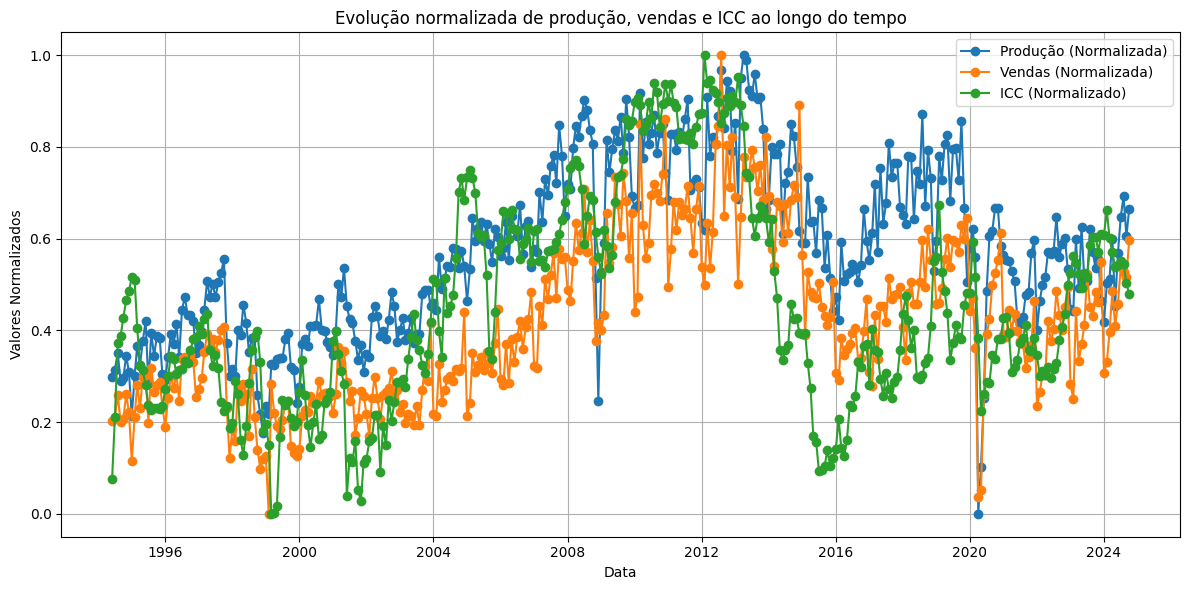

In [7]:
import matplotlib.pyplot as plt

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(analise_multivariada['Data'], analise_multivariada['Producao_Normalizada'], label='Produção (Normalizada)', marker='o')
plt.plot(analise_multivariada['Data'], analise_multivariada['Vendas_Normalizada'], label='Vendas (Normalizada)', marker='o')
plt.plot(analise_multivariada['Data'], analise_multivariada['ICC_Normalizado'], label='ICC (Normalizado)', marker='o')
plt.title('Evolução normalizada de produção, vendas e ICC ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores Normalizados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Claramente, as variáveis percorrem um caminho bastante similar. Porém, pela quantidade de observações e linhas, é difícil seguir uma delas como referência. Por isso, abaixo plotamos as três de forma separada:

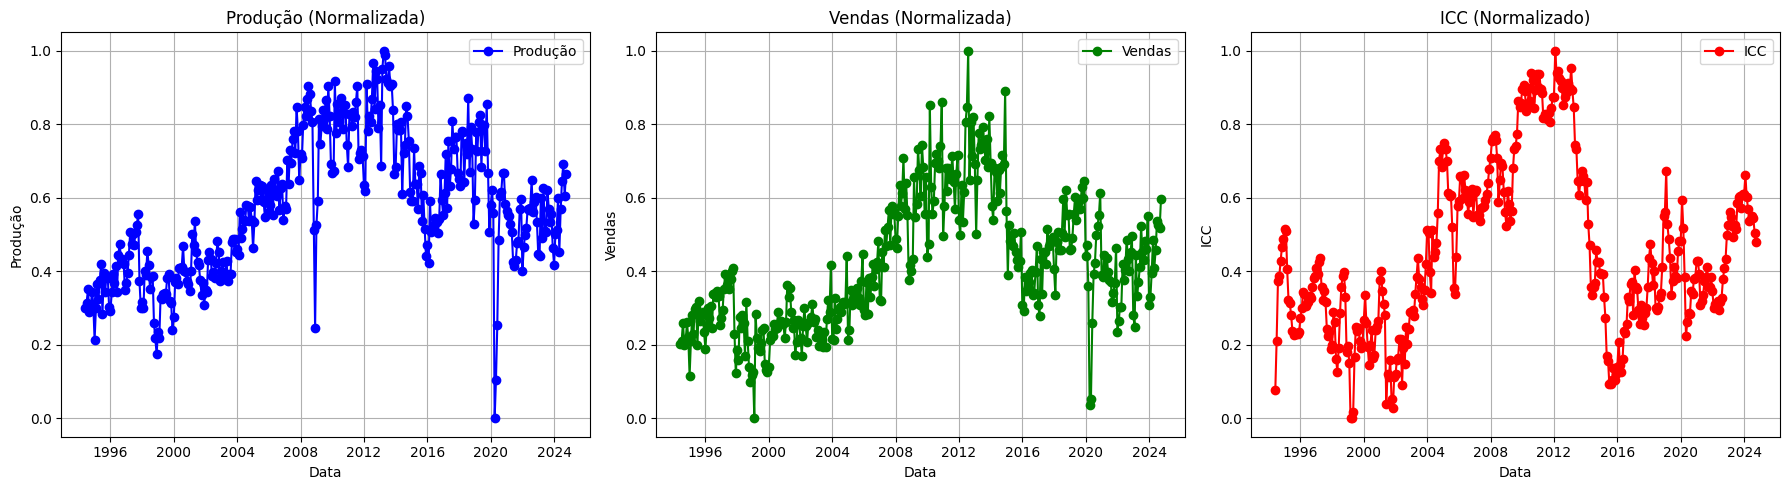

In [8]:
# Para fins de visualização detalhada de cada uma, aqui estão elas plotadas separadamente
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Plotar Produção
axes[0].plot(analise_multivariada['Data'], analise_multivariada['Producao_Normalizada'], label='Produção', color='blue', marker='o')
axes[0].set_title('Produção (Normalizada)')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Produção')
axes[0].grid(True)
axes[0].legend()

# Plotar Vendas
axes[1].plot(analise_multivariada['Data'], analise_multivariada['Vendas_Normalizada'], label='Vendas', color='green', marker='o')
axes[1].set_title('Vendas (Normalizada)')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Vendas')
axes[1].grid(True)
axes[1].legend()

# Plotar ICC
axes[2].plot(analise_multivariada['Data'], analise_multivariada['ICC_Normalizado'], label='ICC', color='red', marker='o')
axes[2].set_title('ICC (Normalizado)')
axes[2].set_xlabel('Data')
axes[2].set_ylabel('ICC')
axes[2].grid(True)
axes[2].legend()


plt.tight_layout()
plt.show()

Finalmente, chegamos a conclusão de que os dados estão em condições de serem usados em um modelo preditivo.

# BORUTA e avaliação de modelos

In [27]:
!pip install boruta

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
import numpy as np

# Selecionar as variáveis independentes (X) e a variável dependente (y)
X = analise_multivariada[['Producao', 'Vendas', 'ICC']]
y = analise_multivariada['Vendas']

# Modelo base do Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Criar o seletor Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)

# Ajustar o Boruta ao conjunto de dados
boruta_selector.fit(X.values, y.values)

# Resultados do Boruta
print("Aceitadas:")
for i, col in enumerate(X.columns):
    if boruta_selector.support_[i]:
        print(col)

print("\nRejeitadas:")
for i, col in enumerate(X.columns):
    if not boruta_selector.support_[i]:
        print(col)

Aceitadas:
Vendas

Rejeitadas:
Producao
ICC


O BORUTA recomendou rejeitar duas das três variáveis. Como esse projeto é baseado em usar uma variável para tentar prever a outra, continuei fazendo testes para garantir que essa seria a melhor ideia.

Como a variável Produção está muito relacionada com a Venda, e geralmente a venda influencia a produção (e não o contrário), experimentei por deixar ela de lado e ver pelo Random Forest Regressor se isso aumenta a acurácia do modelo.

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_todas = analise_multivariada[['Producao', 'Vendas', 'ICC']]  #Vamos testar com todas as variáveis
X_sem_producao = analise_multivariada[['Vendas', 'ICC']]  #Variáveis sem Producao
y = analise_multivariada['Vendas']

X_train_todas, X_test_todas, y_train, y_test = train_test_split(X_todas, y, test_size=0.3, random_state=42)
X_train_sem_producao, X_test_sem_producao, _, _ = train_test_split(X_sem_producao, y, test_size=0.3, random_state=42)

# Todas as variáveis
rf_todas = RandomForestRegressor(n_estimators=100, random_state=42)
rf_todas.fit(X_train_todas, y_train)

# Previsões com todas as variáveis
y_pred_todas = rf_todas.predict(X_test_todas)

# Modelo sem Producao
rf_sem_producao = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sem_producao.fit(X_train_sem_producao, y_train)

# Previsões sem Producao
y_pred_sem_producao = rf_sem_producao.predict(X_test_sem_producao)

# Avaliação de desempenho
mse_todas = mean_squared_error(y_test, y_pred_todas)
r2_todas = r2_score(y_test, y_pred_todas)

mse_sem_producao = mean_squared_error(y_test, y_pred_sem_producao)
r2_sem_producao = r2_score(y_test, y_pred_sem_producao)



print("Desempenho com todas as variáveis:")
print(f"- Mean Squared Error (MSE): {mse_todas:.4f}")
print(f"- R² Score: {r2_todas:.4f}")

print("\nDesempenho sem Producao:")
print(f"- Mean Squared Error (MSE): {mse_sem_producao:.4f}")
print(f"- R² Score: {r2_sem_producao:.4f}")

Desempenho com todas as variáveis:
- Mean Squared Error (MSE): 6284470.0979
- R² Score: 0.9978

Desempenho sem Producao:
- Mean Squared Error (MSE): 3333224.6039
- R² Score: 0.9988


A remoção da variável produção impacta positivamente o modelo. Como podemos ver, o Erro Quadrático Médio (MSE em inglês) reduz quando retiramos ele. Também, R² melhorou levemente.
Por isso, iremos usar essas duas variáveis daqui para frente.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Os três algoritmos a testar, conforme instruções
modelos = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Regressão Linear": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# Avaliação do desempenho
def avaliar_modelo(modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Divisão dos dados
X_train_vendas_icc, X_test_vendas_icc, y_train, y_test = train_test_split(
    X_sem_producao, y, test_size=0.3, random_state=42
)

# Avaliar os modelos e salvar os resultados
resultados_mse = {}
resultados_r2 = {}
for nome, modelo in modelos.items():
    mse, r2 = avaliar_modelo(modelo, X_train_vendas_icc, X_test_vendas_icc, y_train, y_test)
    resultados_mse[nome] = mse
    resultados_r2[nome] = r2


print("\nResultados - Mean Squared Error (MSE):")
for nome, mse in resultados_mse.items():
    print(f"{nome}: {mse:.4f}")

print("\nResultados - R² Score:")
for nome, r2 in resultados_r2.items():
    print(f"{nome}: {r2:.4f}")



Resultados - Mean Squared Error (MSE):
Random Forest: 3333224.6039
Regressão Linear: 0.0000
Gradient Boosting: 2172813.3933

Resultados - R² Score:
Random Forest: 0.9988
Regressão Linear: 1.0000
Gradient Boosting: 0.9992


In [32]:
# Validação cruzada
print("Validação cruzada:")
for nome, modelo in modelos.items():
    r2_scores = cross_val_score(modelo, X_sem_producao, y, cv=kf, scoring='r2')
    print(f"{nome}:")
    print(f"- R² Médio: {np.mean(r2_scores):.4f}")
    print(f"- R² Desvio Padrão: {np.std(r2_scores):.4f}\n")

Validação cruzada:
Random Forest:
- R² Médio: 0.9975
- R² Desvio Padrão: 0.0033

Regressão Linear:
- R² Médio: 1.0000
- R² Desvio Padrão: 0.0000

Gradient Boosting:
- R² Médio: 0.9981
- R² Desvio Padrão: 0.0028



# Gráfico comparativo do desempenho dos modelos

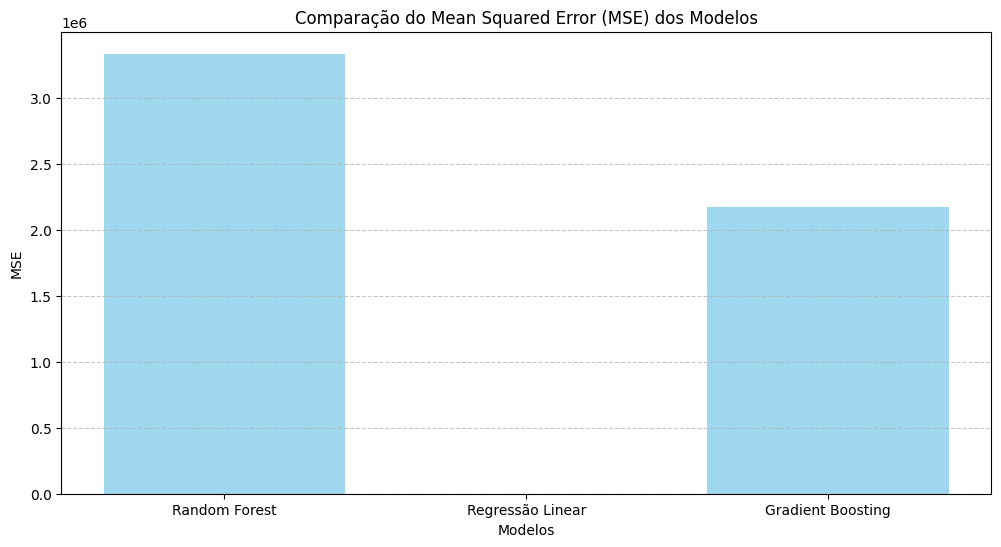

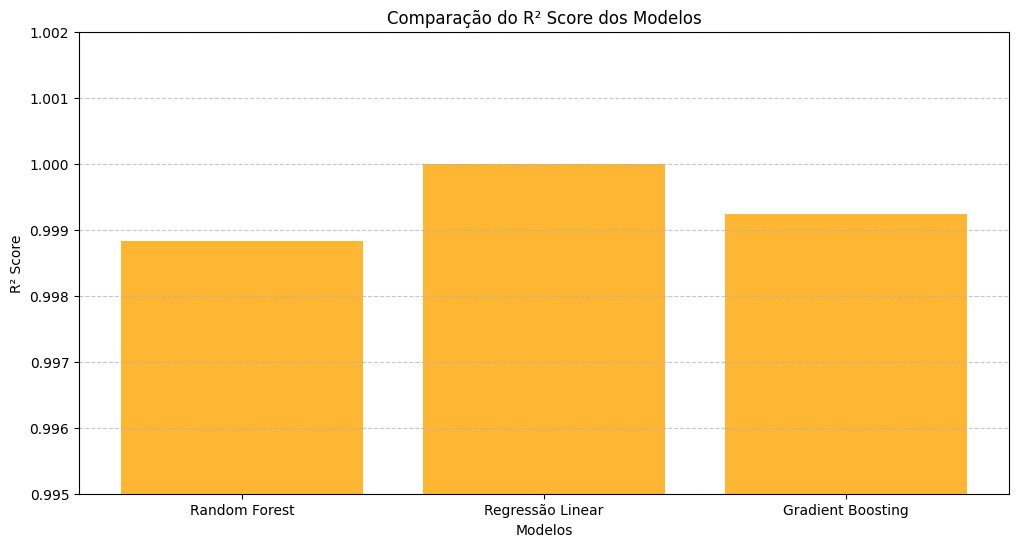

In [26]:
import matplotlib.pyplot as plt

modelos = list(resultados_mse.keys())
mse = list(resultados_mse.values())
r2 = list(resultados_r2.values())

# Gráfico para MSE
plt.figure(figsize=(12, 6))
plt.bar(modelos, mse, color="skyblue", alpha=0.8)
plt.title("Comparação do Mean Squared Error (MSE) dos modelos")
plt.xlabel("Modelos")
plt.ylabel("MSE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Gráfico para R² Score
plt.figure(figsize=(12, 6))
plt.bar(modelos, r2, color="orange", alpha=0.8)
plt.title("Comparação do R² Score dos modelos")
plt.xlabel("Modelos")
plt.ylabel("R² Score")
plt.ylim(0.995, 1.002)  # Ajuste no eixo Y para visualizar as diferenças, já que começando do 0, seria de difícil comparação. Lembrando que eu sou contra não começar do 0 quando não há necessidade :)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

A *regressão linear* me deu um resultado estranho, já que na matriz de correlação, essas duas variáveis estavam em 0.64. Depois de pesquisar muito e da ajuda de alguma inteligência artificial famosa, me foi sugerido fazer alguns testes, incluíndo o abaixo:

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Matriz de correlação
correlacao = X.corr()
print("Matriz de Correlação:")
print(correlacao)

# Calcular o VIF
vif = pd.DataFrame()
vif['Variável'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Variance Inflation Factor):")
print(vif)


Matriz de Correlação:
          Vendas       ICC
Vendas  1.000000  0.641574
ICC     0.641574  1.000000

VIF (Variance Inflation Factor):
  Variável        VIF
0   Vendas  17.261798
1      ICC  17.261798


Como o VIF estpa muito elevado, algo está impedindo o modelo de entender a contribuição de cada variável. Por isso, deixaremos ele de lado para usar uma das variáveis restantes.
Decidi então por usar o Gradient Boosting, já que ele me traz uma acurácia maior. Acurácia é o que preciso para uma previsão de um valor futuro.

#Conclusão e avaliação das métricas

Como percebemos pelos gráficos e cálculos, o Gradient Boosting segue como o melhor modelo atualmente. A métrica principal usada para tomar essa conclusão é o Erro Quadrático Médio, já que quero fazer uma previsão e isso necessita de acurácia.